<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q3-PLN/blob/main/2023_Q3_PLN_AULA_13_Notebook_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q3]**
Prof. Alexandre Donizeti Alves

## **Representação de Textos**
---



A representação de textos em PLN é a forma como as informações contidas em um texto são estruturadas e organizadas para que possam ser processadas por algoritmos de computador. Essa representação é importante porque os computadores não conseguem entender textos como os seres humanos, eles precisam de uma forma estruturada de apresentação dos dados para poderem trabalhar com eles.

Existem várias formas de representação de textos em PLN, e cada uma delas é adequada para diferentes tipos de tarefas.

**Codificação *One-Hot***

A codificação *one-hot* é uma técnica utilizada para representar variáveis categóricas em forma de vetores numéricos binários. É uma técnica comumente utilizada em aprendizado de máquina e PLN.

Nessa técnica, cada categoria é representada por um vetor binário de tamanho igual ao número total de categorias. Cada posição do vetor representa uma categoria distinta, e apenas uma posição no vetor é 1, enquanto todas as outras são 0. A posição em que o valor é 1 indica a categoria correspondente àquela posição.

Por exemplo, se tivermos três categorias: "vermelho", "azul" e "verde", podemos usar a codificação *one-hot* para representá-las em vetores binários:

    vermelho = [1, 0, 0]
    azul = [0, 1, 0]
    verde = [0, 0, 1]

Essa técnica é útil porque permite que as variáveis categóricas sejam utilizadas como entradas para algoritmos de aprendizado de máquina que exigem dados numéricos como entrada. Além disso, a codificação *one-hot* evita que as categorias sejam erroneamente interpretadas como variáveis numéricas ordenadas, o que não é correto para a maioria das variáveis categóricas.

A codificação *one-hot* pode ser usada em várias aplicações de PLN, como na representação de palavras em textos, onde cada palavra pode ser representada como um vetor binário que indica se a palavra ocorre ou não no texto. A técnica também pode ser utilizada para representar categorias de tópicos em textos ou em sistemas de recomendação baseados em conteúdo.

Aqui está um exemplo simples de como usar a codificação *one-hot* para representar categorias em Python:

In [8]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# criando um conjunto de dados de exemplo
categorias = np.array(['frutas', 'legumes', 'carnes',
                       'frutas', 'carnes', 'legumes'])

# criando um objeto de codificacao one-hot
encoder = OneHotEncoder()

# aplicando a codificacao one-hot aos dados
categorias_encoded = encoder.fit_transform(categorias.reshape(-1, 1))

# Imprimindo as categorias codificadas
print(categorias_encoded.toarray())

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


Neste exemplo, primeiro importamos a biblioteca `sklearn.preprocessing`, que contém a classe `OneHotEncoder`. Em seguida, é definido um conjunto de dados de exemplo, representando diferentes categorias.

O próximo passo é criar um objeto `OneHotEncoder()` e aplicar a codificação *one-hot* aos dados de categorias usando o método `fit_transform()`. O resultado é uma matriz de números binários que representa cada categoria em forma de vetor *one-hot*.

Por fim, imprimimos a matriz de categorias codificadas usando o método `toarray()`. O resultado deve ser uma matriz de tamanho (6, 3) (já que temos três categorias únicas), onde cada linha representa uma categoria em forma de vetor *one-hot*.



Note que, neste exemplo, usamos o método `reshape(-1, 1)` para transformar o vetor de categorias em uma matriz de uma coluna, que é o formato esperado pelo `fit_transform()`. Além disso, usamos o método `toarray()` para converter o resultado do `fit_transform()` em uma matriz `numpy` convencional para facilitar a impressão.

Aqui está outro exemplo de como usar a codificação `one-hot` em Python para representar dados categóricos:

In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# criando um dataframe com dados categoricos
df = pd.DataFrame({'cor': ['vermelho', 'azul', 'verde', 'verde',
                           'vermelho', 'azul']})

# criando um objeto OneHotEncoder
encoder = OneHotEncoder()

# aplicando o codificador aos dados
dados_encoded = encoder.fit_transform(df)

# imprimindo o dataframe codificado
df_encoded = pd.DataFrame(dados_encoded.toarray(), columns=encoder.get_feature_names_out(['cor']))
print(df_encoded)

   cor_azul  cor_verde  cor_vermelho
0       0.0        0.0           1.0
1       1.0        0.0           0.0
2       0.0        1.0           0.0
3       0.0        1.0           0.0
4       0.0        0.0           1.0
5       1.0        0.0           0.0


Aqui está um exemplo completo de como usar a codificação `one-hot` para representar avaliações de filmes em Python usando um `DataFrame`:

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# criando um dataframe com as avaliacoes
df = pd.DataFrame({'avaliacao': ['O filme foi excelente',
                                 'A história foi um pouco confusa',
                                 'O elenco foi muito talentoso',
                                 'Não gostei do final do filme']})

# criando um objeto CountVectorizer para extrair os recursos de texto
vectorizer = CountVectorizer(binary=True)

# aplicando o vetorizador aos dados de avaliacoes
avaliacoes_encoded = vectorizer.fit_transform(df['avaliacao'])

# imprimindo o vocabulario extraido pelo vetorizador
print('Vocabulario:')
print(vectorizer.get_feature_names_out())

# imprimindo a matriz de avaliacoes codificadas
print('\nMatriz de avaliações codificadas:')
print(avaliacoes_encoded.toarray())

# criando um dataframe com as avaliacoes codificadas
df_encoded = pd.DataFrame(avaliacoes_encoded.toarray(), columns=vectorizer.get_feature_names_out())

# imprimindo o dataframe de avaliacoes codificadas
print('\nDataframe de avaliacoes codificadas:')
print(df_encoded)

Vocabulario:
['confusa' 'do' 'elenco' 'excelente' 'filme' 'final' 'foi' 'gostei'
 'história' 'muito' 'não' 'pouco' 'talentoso' 'um']

Matriz de avaliações codificadas:
[[0 0 0 1 1 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 1 0 0 1 0 1]
 [0 0 1 0 0 0 1 0 0 1 0 0 1 0]
 [0 1 0 0 1 1 0 1 0 0 1 0 0 0]]

Dataframe de avaliacoes codificadas:
   confusa  do  elenco  excelente  filme  final  foi  gostei  história  muito  \
0        0   0       0          1      1      0    1       0         0      0   
1        1   0       0          0      0      0    1       0         1      0   
2        0   0       1          0      0      0    1       0         0      1   
3        0   1       0          0      1      1    0       1         0      0   

   não  pouco  talentoso  um  
0    0      0          0   0  
1    0      1          0   1  
2    0      0          1   0  
3    1      0          0   0  


Aqui está um exemplo simples:

In [12]:
documentos = ["Cachorro morde homem.",
             "Homem morde cachorro.",
             "Cachorro come carne.",
             "Homem come comida."]

processed_docs = [doc.lower().replace(".","") for doc in documentos]
processed_docs

['cachorro morde homem',
 'homem morde cachorro',
 'cachorro come carne',
 'homem come comida']

In [14]:
# vocabulario
vocab = {}
count = 0
for doc in processed_docs:
    for word in doc.split():
        if word not in vocab:
            count = count +1
            vocab[word] = count
print(vocab)

{'cachorro': 1, 'morde': 2, 'homem': 3, 'come': 4, 'carne': 5, 'comida': 6}


In [17]:
vocab

{'cachorro': 1, 'morde': 2, 'homem': 3, 'come': 4, 'carne': 5, 'comida': 6}

In [15]:
def get_onehot_vector(somestring):
    onehot_encoded = []
    for word in somestring.split():
        temp = [0]*len(vocab)
        if word in vocab:
            # -1 is to take care of the fact indexing in array starts from 0 and not 1
            temp[vocab[word]-1] = 1
        onehot_encoded.append(temp)

    return onehot_encoded

In [16]:
print(processed_docs[0])
get_onehot_vector(processed_docs[0])

cachorro morde homem


[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0]]

In [20]:
get_onehot_vector("homem e cachorro são bons")

[[0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

***Bag of Words***

A representação de textos *Bag of Words* é uma técnica simples e amplamente utilizada na área de PLN para representar documentos de texto como vetores numéricos que podem ser usados em algoritmos de aprendizado de máquina.

A ideia básica por trás da representação *Bag of Words* é contar a frequência de ocorrência de cada palavra em um determinado texto e, em seguida, construir um vetor numérico que representa esse texto, onde cada elemento do vetor representa a frequência de uma palavra específica. Dessa forma, um documento de texto é representado como um vetor de tamanho fixo, onde cada posição do vetor representa uma palavra distinta do texto.

Aqui está um exemplo de como criar uma representação *Bag of Words* usando o Python e a biblioteca `scikit-learn`:

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# conjunto de documentos de exemplo
documentos = ['O céu está azul e as nuvens brancas',
              'O sol está quente e o céu está azul',
              'As nuvens são brancas e o sol está quente']

# criando um objeto CountVectorizer
vectorizer = CountVectorizer()

# aplicando o vetorizador aos documentos
bag_of_words = vectorizer.fit_transform(documentos)

# imprimindo o vocabulario
vocabulario = vectorizer.get_feature_names_out()
print("Vocabulario:")
print(vocabulario)

# imprimindo a representacao Bag-of-Words dos documentos
print("Representacao Bag-of-Words:")
print(bag_of_words.toarray())

Vocabulario:
['as' 'azul' 'brancas' 'céu' 'está' 'nuvens' 'quente' 'sol' 'são']
Representacao Bag-of-Words:
[[1 1 1 1 1 1 0 0 0]
 [0 1 0 1 2 0 1 1 0]
 [1 0 1 0 1 1 1 1 1]]


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# conjunto de documentos de exemplo
documentos = ['Cachorro morde homem',
              'Homem morde cachorro',
              'Cachorro come carne',
              'Homem come comida']

# criando um objeto CountVectorizer
vectorizer = CountVectorizer()

# aplicando o vetorizador aos documentos
bag_of_words = vectorizer.fit_transform(documentos)

# imprimindo o vocabulario
vocabulario = vectorizer.get_feature_names_out()
print("Vocabulario:")
print(vocabulario)

# imprimindo a representacao Bag-of-Words dos documentos
print("Representacao Bag-of-Words:")
print(bag_of_words.toarray())

Vocabulario:
['cachorro' 'carne' 'come' 'comida' 'homem' 'morde']
Representacao Bag-of-Words:
[[1 0 0 0 1 1]
 [1 0 0 0 1 1]
 [1 1 1 0 0 0]
 [0 0 1 1 1 0]]


Aqui está um exemplo de como criar uma representação *Bag of Words* usando a biblioteca NLTK do Python:

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# conjunto de documentos de exemplo
documentos = ['O céu está azul e as nuvens brancas',
              'O sol está quente e o céu está azul',
              'As nuvens são brancas e o sol está quente']

# tokenizando os documentos
tokens = [word_tokenize(doc.lower()) for doc in documentos]

# criando um vocabulario a partir dos tokens
vocabulario = sorted(set([token for doc in tokens for token in doc]))

# criando a representação Bag-of-Words dos documentos
bow = []
for doc in tokens:
    contador = Counter(doc)
    bag_of_words = [contador[token] if token in doc else 0 for token in vocabulario]
    bow.append(bag_of_words)

# Imprimindo o vocabulário
print("Vocabulario:")
print(vocabulario)

# imprimindo a representacao Bag-of-Words dos documentos
print("Representacao Bag-of-Words:")
for i, doc in enumerate(bow):
    print(f"Documento {i+1}: {doc}")

Vocabulario:
['as', 'azul', 'brancas', 'céu', 'e', 'está', 'nuvens', 'o', 'quente', 'sol', 'são']
Representacao Bag-of-Words:
Documento 1: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
Documento 2: [0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0]
Documento 3: [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]


In [28]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# conjunto de documentos de exemplo
documentos = ['Cachorro morde homem',
              'Homem morde cachorro',
              'Cachorro come carne',
              'Homem come comida']

# tokenizando os documentos
tokens = [word_tokenize(doc.lower()) for doc in documentos]

# criando um vocabulario a partir dos tokens
vocabulario = sorted(set([token for doc in tokens for token in doc]))

# criando a representacao Bag-of-Words dos documentos
bow = []
for doc in tokens:
    contador = Counter(doc)
    bag_of_words = [contador[token] if token in doc else 0 for token in vocabulario]
    bow.append(bag_of_words)

# imprimindo o vocabulario
print("Vocabulario:")
print(vocabulario)

# imprimindo a representacao Bag-of-Words dos documentos
print("Representacao Bag-of-Words:")
for i, doc in enumerate(bow):
    print(f"Documento {i+1}: {doc}")

Vocabulario:
['cachorro', 'carne', 'come', 'comida', 'homem', 'morde']
Representacao Bag-of-Words:
Documento 1: [1, 0, 0, 0, 1, 1]
Documento 2: [1, 0, 0, 0, 1, 1]
Documento 3: [1, 1, 1, 0, 0, 0]
Documento 4: [0, 0, 1, 1, 1, 0]


In [29]:
# Testando com um novo documento que tem uma palavra fora do vocabulário
novo_doc = "Cachorro briga com gato"
novo_tokens = word_tokenize(novo_doc.lower())
novo_bow = [0 for _ in range(len(vocabulario))]
for token in novo_tokens:
    if token in vocabulario:
        novo_bow[vocabulario.index(token)] += 1

print(f"Representacao Bag-of-Words do novo documento: {novo_bow}")

Representacao Bag-of-Words do novo documento: [1, 0, 0, 0, 0, 0]


Notem que para palavras que não estão no vocabulário, simplesmente deixamos o valor correspondente como zero.

Aqui está um exemplo interessante de como usar a representação *Bag of Words* para comparar a similaridade entre documentos:

In [30]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# conjunto de documentos de exemplo
documentos = ['O céu está azul e as nuvens brancas',
              'O sol está quente e o céu está azul',
              'As nuvens são brancas e o sol está quente',
              'O cachorro corre no parque',
              'O gato dorme no tapete']

# tokenizando os documentos
tokens = [word_tokenize(doc.lower()) for doc in documentos]

# criando um vocabulario a partir dos tokens
vocabulario = sorted(set([token for doc in tokens for token in doc]))

# criando a representacao Bag-of-Words dos documentos
bow = []
for doc in tokens:
    contador = Counter(doc)
    bag_of_words = [contador[token] if token in doc else 0 for token in vocabulario]
    bow.append(bag_of_words)

# calculando a similaridade de cosseno entre todos os pares de documentos
similarity_matrix = cosine_similarity(np.array(bow))

# imprimindo a matriz de similaridade
print("Matriz de similaridade:")
print(similarity_matrix)

Matriz de similaridade:
[[1.         0.68640647 0.70710678 0.15811388 0.15811388]
 [0.68640647 1.         0.64715023 0.24806947 0.24806947]
 [0.70710678 0.64715023 1.         0.1490712  0.1490712 ]
 [0.15811388 0.24806947 0.1490712  1.         0.4       ]
 [0.15811388 0.24806947 0.1490712  0.4        1.        ]]


No exemplo acima, temos cinco documentos. A diagonal principal da matriz de similaridade é sempre igual a 1, pois um documento é sempre idêntico a ele mesmo. As outras entradas da matriz de similaridade representam a similaridade entre dois documentos.

***Bag of N-grams***

A representação "*bag of n-grams*" é baseada na ideia de que o significado de uma palavra ou termo pode ser parcialmente inferido a partir dos outros termos que aparecem nas proximidades. Dessa forma, ao invés de considerar apenas as palavras individuais em um documento de texto, a representação "*bag of n-grams*" considera sequências de n palavras (ou "*n-grams*") que aparecem no documento.

Por exemplo, para n=2, os "bigramas" seriam considerados, e para a frase "O gato preto pulou o muro", os bigramas seriam "O gato", "gato preto", "preto pulou", "pulou o", e "o muro". O número de bigramas em um documento pode variar, mas a ideia é contar quantas vezes cada bigrama aparece no documento.

Dessa forma, a representação "*bag of n-grams*" é uma representação baseada em contagem, que lista cada bigrama (ou n-grama) encontrado no documento, e o número de vezes que ele aparece. Essa representação é frequentemente transformada em um vetor numérico, onde cada posição no vetor corresponde a um bigrama, e o valor na posição indica o número de vezes que o bigrama apareceu no documento.

Essa representação é útil para análise de texto porque é capaz de capturar informações semânticas e de contexto que seriam perdidas se considerássemos apenas as palavras isoladas. Além disso, é uma representação simples e fácil de ser calculada a partir de textos brutos, o que a torna uma técnica popular em diversas aplicações de PLN.

Aqui está um exemplo simples de como utilizar a representação "*bag of n-grams*" em Python:

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# definir uma lista de frases de exemplo
sentences = ["Cachorro morde homem",
             "Homem morde cachorro"]

# criar um objeto CountVectorizer para gerar a representacao "bag of n-grams"
vectorizer = CountVectorizer(ngram_range=(1, 2))

# aplicar o vetorizador às frases para gerar a matriz de contagem
X = vectorizer.fit_transform(sentences)

# visualizar a matriz de contagem
print(X.toarray())

# visualizar o vocabulario de bigramas gerado pelo vetorizador
print(vectorizer.get_feature_names_out())

[[1 1 1 0 1 0 1]
 [1 0 1 1 1 1 0]]
['cachorro' 'cachorro morde' 'homem' 'homem morde' 'morde'
 'morde cachorro' 'morde homem']


Aqui está um exemplo de código em Python que utiliza a representação "*bag of n-grams*" para processar um documento de texto:

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# definir uma lista de documentos de texto de exemplo
docs = ["O gato preto pulou o muro",
        "O cachorro marrom correu atrás do gato",
        "O pássaro voou alto no céu"]

# criar um objeto CountVectorizer para gerar a representacao "bag of n-grams"
vectorizer = CountVectorizer(ngram_range=(1, 2)) # considera unigramas e bigramas

# aplicar o vetorizador aos documentos para gerar a matriz de contagem
X = vectorizer.fit_transform(docs)

# visualizar a matriz de contagem
print(X.toarray())

# visualizar o vocabulario de bigramas gerado pelo vetorizador
print(vectorizer.get_feature_names_out())

[[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0]
 [0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1]]
['alto' 'alto no' 'atrás' 'atrás do' 'cachorro' 'cachorro marrom' 'correu'
 'correu atrás' 'céu' 'do' 'do gato' 'gato' 'gato preto' 'marrom'
 'marrom correu' 'muro' 'no' 'no céu' 'preto' 'preto pulou' 'pulou'
 'pulou muro' 'pássaro' 'pássaro voou' 'voou' 'voou alto']


Nesse exemplo, utilizamos a biblioteca `Scikit-learn` para criar um objeto `CountVectorizer`, que é responsável por gerar a representação "*bag of n-grams*" dos documentos de texto.

Definimos uma lista de documentos de exemplo e criamos o objeto `CountVectorizer`, especificando que queremos considerar tanto unigramas quanto bigramas. Em seguida, aplicamos o vetorizador aos documentos para gerar a matriz de contagem, que contém a contagem de cada bigrama (e unigrama) em cada documento.

Por fim, imprimimos a matriz de contagem e o vocabulário gerado pelo vetorizador (unigramas e bigramas). A matriz de contagem é uma matriz numérica onde cada linha corresponde a um documento e cada coluna corresponde a um bigrama (ou unigrama).

Aqui está um exemplo de como utilizar a representação "*bag of n-grams*" utilizando o pacote `NLTK`:

In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

# definir uma lista de frases de exemplo
sentences = ["Este é um exemplo simples",
             "Este é outro exemplo simples",
             "Este exemplo é mais complexo"]

# tokenizar cada frase em palavras
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# gerar bigramas para cada frase tokenizada
all_bigrams = []
for tokenized_sentence in tokenized_sentences:
    bigrams = ngrams(tokenized_sentence, 2)
    all_bigrams += bigrams

# contar a frequencia de cada bigrama em todos as frases
bigram_counts = Counter(all_bigrams)

# imprimir o vocabulario de bigramas
vocabulary = list(bigram_counts.keys())
print(vocabulary)

# criar um vetor com as contagens de cada bigrama para cada frase
vectors = []
for tokenized_sentence in tokenized_sentences:
    sentence_bigrams = ngrams(tokenized_sentence, 2)
    sentence_bigram_counts = Counter(sentence_bigrams)
    sentence_vector = [sentence_bigram_counts[bigram] for bigram in bigram_counts.keys()]
    vectors.append(sentence_vector)

# imprimir a matriz de contagens de bigramas
print(vectors)

[('este', 'é'), ('é', 'um'), ('um', 'exemplo'), ('exemplo', 'simples'), ('é', 'outro'), ('outro', 'exemplo'), ('este', 'exemplo'), ('exemplo', 'é'), ('é', 'mais'), ('mais', 'complexo')]
[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1]]


Suponha que você tenha uma lista de tweets e deseje identificar os tópicos mais discutidos. Você pode usar a representação "*bag of n-grams*" para extrair os bigramas mais comuns e, em seguida, visualizá-los em um gráfico de nuvem de palavras.

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# definir uma lista de tweets de exemplo
tweets = ["A eleição presidencial está se aproximando",
          "Os candidatos estão participando de debates",
          "A economia é um dos principais temas entre os candidatos",
          "A saúde também é um tema importante para os candidatos",
          "Houve acusações de corrupção entre os candidatos"]

# criar um objeto CountVectorizer para extrair bigramas
vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = vectorizer.fit_transform(tweets)

# obter as palavras e contagens de bigramas mais comuns
bigram_counts = zip(vectorizer.get_feature_names_out(), bigram_matrix.sum(axis=0).A1)
top_bigrams = sorted(bigram_counts, key=lambda x: x[1], reverse=True)[:10]

# Imprimir os 10 bigramas mais comuns
for bigram, count in top_bigrams:
    print(f"{bigram}: {count}")


os candidatos: 4
entre os: 2
acusações de: 1
candidatos estão: 1
corrupção entre: 1
de corrupção: 1
de debates: 1
dos principais: 1
economia um: 1
eleição presidencial: 1


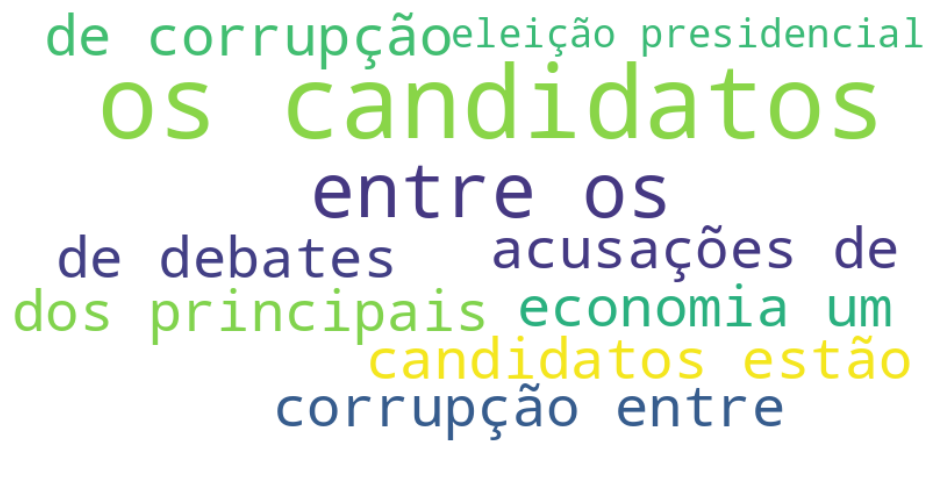

In [45]:
# criar um grafico de nuvem de palavras com os bigramas mais comuns
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_bigrams))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

***TF-IDF***

**TF-IDF** (*Term Frequency-Inverse Document Frequency*) é uma técnica de processamento de texto que mede a relevância de um termo em um documento ou córpus, com base na frequência em que o termo aparece no documento e no conjunto de documentos.

A representação **TF-IDF** consiste em dois componentes:

  * **Frequência do termo (TF)**: a frequência do termo refere-se à contagem do número de vezes que um determinado termo aparece em um documento. É calculada dividindo o número de vezes que um termo aparece pelo número total de termos no documento. Esse cálculo ajuda a determinar a importância de um termo em um determinado documento.

  * **Frequência inversa do documento (IDF)**: a frequência inversa do documento é usada para medir a raridade de um termo em todo o conjunto de documentos. Ela é calculada dividindo o número total de documentos pelo número de documentos em que o termo aparece. O resultado é passado por uma função logarítmica para evitar a amplificação excessiva de termos muito raros ou muito comuns.

A representação **TF-IDF** é obtida multiplicando-se a frequência do termo (TF) pela frequência inversa do documento (IDF). Isso ajuda a atribuir um peso maior aos termos que aparecem com menos frequência em todo o conjunto de documentos e, portanto, são mais discriminativos e informativos.

O resultado do **TF-IDF** é importante porque ele ajuda a identificar os termos mais importantes em um documento ou conjunto de documentos. Esses termos mais importantes podem ser usados para várias tarefas de processamento de texto, como recuperação de informações, classificação de documentos, agrupamento de documentos e análise de sentimentos.

Por exemplo, em uma tarefa de recuperação de informações, o **TF-IDF** pode ser usado para identificar os documentos mais relevantes para uma determinada consulta de pesquisa, atribuindo uma pontuação a cada documento com base na presença dos termos da consulta e em sua importância relativa nos documentos. Isso pode ajudar a melhorar a precisão da recuperação de informações.

Da mesma forma, em uma tarefa de classificação de documentos, o **TF-IDF** pode ser usado para identificar os termos mais discriminativos e informativos para cada classe de documentos e, em seguida, usá-los para treinar um modelo de classificação que possa classificar novos documentos em suas respectivas classes.

Em resumo, o resultado do **TF-IDF** é importante porque ajuda a identificar os termos mais importantes em um documento ou conjunto de documentos e, em seguida, usá-los para várias tarefas de processamento de texto, melhorando a precisão e a eficiência dessas tarefas.

**TF-IDF** é o produto desses dois valores (TF e IDF). O **TF-IDF** atribui uma pontuação a cada termo em um documento, dando maior peso a termos que aparecem com frequência no documento em questão, mas raramente em outros documentos no córpus.

* **Maior Valor de TF-IDF**: indica que o termo é mais relevante ou
importante para o documento em análise. Isso ocorre quando um termo é frequente no documento em questão, mas raro nos outros documentos do córpus. Isso significa que o termo é mais específico para o documento, fornecendo informações distintas e relevantes.

* **Menor Valor de TF-IDF**: indica que o termo é menos relevante ou menos distintivo para o documento em análise. Isso acontece quando um termo é comum, aparecendo em vários documentos do córpus. Isso sugere que o termo não fornece muita informação exclusiva sobre o documento, já que é encontrado em muitos outros documentos também.



Em **resumo**, um **alto valor de TF-IDF** para um termo indica que ele é mais raro e mais relevante para o documento específico, enquanto um **valor baixo de TF-IDF** sugere que o termo é mais comum e menos distintivo para aquele documento em relação ao conjunto de documentos.

Aqui está um exemplo simples de como implementar a representação **TF-IDF** em Python usando a biblioteca `scikit-learn`:

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# lista de documentos
documents = [
  "Este é um exemplo de documento.",
  "Outro exemplo de documento.",
  "E mais um exemplo de documento."
]

# criar um vetorizador TF-IDF
vectorizer = TfidfVectorizer()

# fit_transform() retorna a matriz tf-idf
tf_idf_matrix = vectorizer.fit_transform(documents)

# exibir a matriz tf-idf
print(tf_idf_matrix)

  (0, 1)	0.3645443967613799
  (0, 0)	0.3645443967613799
  (0, 3)	0.3645443967613799
  (0, 6)	0.4694172843223779
  (0, 2)	0.6172273175654565
  (1, 5)	0.6990303272568005
  (1, 1)	0.4128585720620119
  (1, 0)	0.4128585720620119
  (1, 3)	0.4128585720620119
  (2, 4)	0.6172273175654565
  (2, 1)	0.3645443967613799
  (2, 0)	0.3645443967613799
  (2, 3)	0.3645443967613799
  (2, 6)	0.4694172843223779


In [49]:
vectorizer.get_feature_names_out()

array(['de', 'documento', 'este', 'exemplo', 'mais', 'outro', 'um'],
      dtype=object)

In [53]:
print(np.round(tf_idf_matrix.toarray(), 2))

[[0.36 0.36 0.62 0.36 0.   0.   0.47]
 [0.41 0.41 0.   0.41 0.   0.7  0.  ]
 [0.36 0.36 0.   0.36 0.62 0.   0.47]]


Neste exemplo, estamos criando uma matriz de representação **TF-IDF** para uma lista de três documentos simples. A saída será uma matriz esparsa, na qual cada linha representa um documento e cada coluna representa uma palavra. Os valores na matriz representam o peso **TF-IDF** para cada palavra em cada documento.

Aqui está um exemplo de como você pode converter a matriz esparsa resultante em uma matriz densa e visualizá-la:

In [ ]:
import numpy as np

# converter a matriz esparsa em uma matriz densa
dense_matrix = tf_idf_matrix.todense()

# criar um array com os nomes das palavras
feature_names = vectorizer.get_feature_names_out()

# exibir a matriz densa
print(np.round(dense_matrix, 2))

[[0.36 0.36 0.62 0.36 0.   0.   0.47]
 [0.41 0.41 0.   0.41 0.   0.7  0.  ]
 [0.36 0.36 0.   0.36 0.62 0.   0.47]]


Este código converte a matriz esparsa em uma matriz densa, arredonda os valores para duas casas decimais e exibe a matriz resultante. A saída será uma matriz 3x6, na qual cada linha representa um documento e cada coluna representa uma palavra. Os valores na matriz representam o peso **TF-IDF** para cada palavra em cada documento.

Aqui está outro exemplo em Python usando a biblioteca `NLTK`:

In [47]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# dados de exemplo
documentos = [
  "O céu é azul.",
  "O sol é brilhante.",
  "O céu no verão é muito quente.",
  "Eu gosto de fazer piquenique no parque.",
  "O parque é um ótimo lugar para relaxar."
]

# tokenizar os documentos
tokens = [word_tokenize(doc.lower()) for doc in documentos]

# remover as stopwords
stopwords = set(stopwords.words('portuguese'))
tokens = [[token for token in doc if token not in stopwords] for doc in tokens]

# criar um objeto TfidfVectorizer
vectorizer = TfidfVectorizer()

# calcular o tf-idf dos documentos
tfidf = vectorizer.fit_transform([' '.join(doc) for doc in tokens])

# imprimir as palavras unicas no vocabulário
print("Vocabulario:", vectorizer.get_feature_names_out())

# imprimir as matrizes de frequencia de termos (tf) e inversa da frequencia do documento (idf)
print("Matriz tf-idf:\n", tfidf.toarray())

Vocabulario: ['azul' 'brilhante' 'céu' 'fazer' 'gosto' 'lugar' 'parque' 'piquenique'
 'quente' 'relaxar' 'sol' 'verão' 'ótimo']
Matriz tf-idf:
 [[0.77828292 0.         0.62791376 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.70710678 0.         0.         0.         0.
  0.         0.         0.         0.         0.70710678 0.
  0.        ]
 [0.         0.         0.49552379 0.         0.         0.
  0.         0.         0.61418897 0.         0.         0.61418897
  0.        ]
 [0.         0.         0.         0.52335825 0.52335825 0.
  0.42224214 0.52335825 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.52335825
  0.42224214 0.         0.         0.52335825 0.         0.
  0.52335825]]


Neste exemplo, estamos usando o `NLTK` para tokenizar os documentos e remover as *stopwords* em português. Em seguida, criamos um objeto `TfidfVectorizer` e o usamos para calcular o TF-IDF dos documentos. Por fim, imprimimos as palavras únicas no vocabulário e as matrizes de frequência de termos e inversa da frequência do documento.

Aqui está um exemplo simples usando TF-IDF:

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# lista de documentos
documentos = ['Cachorro morde homem',
              'Homem morde cachorro',
              'Cachorro come carne',
              'Homem come comida']

# criar um vetorizador TF-IDF
vectorizer = TfidfVectorizer()

# fit_transform() retorna a matriz tf-idf
tf_idf_matrix = vectorizer.fit_transform(documentos)

# imprimir as palavras únicas no vocabulário
print("Vocabulario:", vectorizer.get_feature_names_out())

# imprimir as matrizes de frequência de termos (tf) e inversa da frequência do documento (idf)
print("Matriz tf-idf:\n", tf_idf_matrix.toarray())

Vocabulario: ['cachorro' 'carne' 'come' 'comida' 'homem' 'morde']
Matriz tf-idf:
 [[0.53256952 0.         0.         0.         0.53256952 0.65782931]
 [0.53256952 0.         0.         0.         0.53256952 0.65782931]
 [0.44809973 0.70203482 0.55349232 0.         0.         0.        ]
 [0.         0.         0.55349232 0.70203482 0.44809973 0.        ]]


Aqui está uma implementação básica da representação TF-IDF:

In [55]:
# carregando os documentos
doc1 = "cachorro morde homem"
doc2 = "homem morde cachorro"
doc3 = "cachorro come carne"
doc4 = "homem come comida"

In [ ]:
# separando por espacos
bow1 = doc1.split(" ")
bow2 = doc2.split(" ")
bow3 = doc3.split(" ")
bow4 = doc4.split(" ")

In [ ]:
bow1

['cachorro', 'morde', 'homem']

In [ ]:
# unindo os documentos em um corpus
wordSet = set(bow1).union(set(bow2)).union(set(bow3).union(set(bow4)))
wordSet

{'cachorro', 'carne', 'come', 'comida', 'homem', 'morde'}

In [ ]:
# criando dicionarios de palavras, frequencias
wordDict1 = dict.fromkeys(wordSet, 0)
wordDict2 = dict.fromkeys(wordSet, 0)
wordDict3 = dict.fromkeys(wordSet, 0)
wordDict4 = dict.fromkeys(wordSet, 0)

In [ ]:
wordDict1

{'morde': 0, 'comida': 0, 'homem': 0, 'carne': 0, 'cachorro': 0, 'come': 0}

In [ ]:
# incrementando a frequencia de cada dict
for word in bow1:
    wordDict1[word]+=1

for word in bow2:
    wordDict2[word]+=1

for word in bow3:
    wordDict3[word]+=1

for word in bow4:
    wordDict4[word]+=1

In [ ]:
wordDict1

{'morde': 1, 'comida': 0, 'homem': 1, 'carne': 0, 'cachorro': 1, 'come': 0}

In [ ]:
import pandas as pd

pd.DataFrame([wordDict1, wordDict2, wordDict3, wordDict4])

,morde,comida,homem,carne,cachorro,come
0,1,0,1,0,1,0
1,1,0,1,0,1,0
2,0,0,0,1,1,1
3,0,1,1,0,0,1


In [ ]:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

In [ ]:
# computando TF
tfBow1 = computeTF(wordDict1, bow1)
tfBow2 = computeTF(wordDict2, bow2)
tfBow3 = computeTF(wordDict3, bow3)
tfBow4 = computeTF(wordDict4, bow4)

In [ ]:
tfBow1

{'morde': 0.3333333333333333,
 'comida': 0.0,
 'homem': 0.3333333333333333,
 'carne': 0.0,
 'cachorro': 0.3333333333333333,
 'come': 0.0}

In [ ]:
def termFrequency(term, document):
    normalizeDocument = document.lower().split()
    return normalizeDocument.count(term.lower()) / float(len(normalizeDocument))

In [ ]:
termFrequency('cachorro', doc1)

0.3333333333333333

In [ ]:
# computando IDF
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)

    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1

    # idfDict = {'come': 2, 'homem': 3, 'cachorro': 3, 'carne': 1, 'comida': 1, 'morde': 2}
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))

    return idfDict

In [ ]:
idfs = computeIDF([wordDict1, wordDict2, wordDict3, wordDict4])

In [ ]:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [ ]:
# computando TF-IDF
tfidfBow1 = computeTFIDF(tfBow1, idfs)
tfidfBow2 = computeTFIDF(tfBow2, idfs)
tfidfBow3 = computeTFIDF(tfBow3, idfs)
tfidfBow4 = computeTFIDF(tfBow4, idfs)

In [ ]:
import pandas as pd

pd.DataFrame([tfidfBow1, tfidfBow2, tfidfBow3, tfidfBow4])

,morde,comida,homem,carne,cachorro,come
0,0.100343,0.000000,0.041646,0.000000,0.041646,0.000000
1,0.100343,0.000000,0.041646,0.000000,0.041646,0.000000
2,0.000000,0.000000,0.000000,0.200687,0.041646,0.100343
3,0.000000,0.200687,0.041646,0.000000,0.000000,0.100343


**Importante**: quanto maior o valor do TF-IDF, mais relevante ou importante é o termo para o documento em análise. Quanto menor o TF-IDF, mais comum é o termo.

---



Aqui está um exemplo de como usar a representação TF-IDF para identificar as palavras mais importantes em uma música:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def obter_palavras_importantes(texto, top_n=5):
    # criar um objeto TfidfVectorizer
    vectorizer = TfidfVectorizer(use_idf=True)

    # calcular o TF-IDF do texto
    tfidf = vectorizer.fit_transform([texto])

    # criar um dicionário de palavras e seus pesos TF-IDF
    palavras = vectorizer.get_feature_names_out()
    pesos = tfidf.toarray()[0]
    dicionario = dict(zip(palavras, pesos))

    # encontrar as palavras mais importantes
    palavras_importantes = sorted(dicionario, key=dicionario.get, reverse=True)[:top_n]

    return {palavra: dicionario[palavra] for palavra in palavras_importantes}

def imprimir_palavras_importantes(texto, top_n=5):
    palavras_importantes = obter_palavras_importantes(texto, top_n)

    print(f"As {top_n} palavras mais importantes no texto são:")
    for palavra, peso in palavras_importantes.items():
        print(f"{palavra}: {peso}")

In [ ]:
# letra da musica
letra = """É pau, é pedra, é o fim do caminho. É um resto de toco, é um pouco sozinho.
           É um caco de vidro, é a vida, é o sol. É a noite, é a morte, é um laço, é o anzol."""

# Imprimir as 5 palavras mais importantes na letra da música
imprimir_palavras_importantes(letra, 5)

As 5 palavras mais importantes no texto são:
um: 0.6575959492214292
de: 0.3287979746107146
anzol: 0.1643989873053573
caco: 0.1643989873053573
caminho: 0.1643989873053573


Neste exemplo, estamos imprimindo as 5 palavras mais importantes na letra da música "Águas de Março", de Tom Jobim,  juntamente com seus respectivos valores TF-IDF. Note que o valor TF-IDF é uma medida de importância relativa que leva em consideração tanto a frequência da palavra em relação ao documento quanto a frequência inversa da palavra em relação ao córpus. Quanto maior o valor TF-IDF de uma palavra, mais importante ela é em relação ao documento.

Este exemplo usa o TF-IDF para calcular a similaridade entre duas frases, permitindo determinar se elas se referem ao mesmo tópico:

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# frases para comparar
frase1 = "O cachorro correu no parque."
frase2 = "O cão correu no jardim."

# criar um objeto TfidfVectorizer
vectorizer = TfidfVectorizer()

# calcular o tf-idf para cada frase
tfidf = vectorizer.fit_transform([frase1, frase2])

# calcular a similaridade de cosseno entre as frases
similarity = cosine_similarity(tfidf)

# imprimir a similaridade
print(similarity[0][1])


0.3360969272762575


Neste exemplo, estamos usando a biblioteca `scikit-learn` para criar um objeto `TfidfVectorizer`, calcular o TF-IDF para cada frase e, em seguida, calcular a similaridade de cosseno entre elas. A similaridade será um valor entre 0 e 1, onde 1 significa que as frases são idênticas e 0 significa que são completamente diferentes.

No próximo exemplo, usaremos o TF-IDF para recomendar documentos semelhantes com base em um documento de entrada:

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# documentos de exemplo
documentos = [
    "O rato roeu a roupa do rei de Roma.",
    "Quem casa quer casa.",
    "Água mole em pedra dura, tanto bate até que fura.",
    "De grão em grão a galinha enche o papo."
]

# criar um objeto TfidfVectorizer
vectorizer = TfidfVectorizer()

# calcular o tf-idf para cada documento
tfidf = vectorizer.fit_transform(documentos)

# documento de entrada para comparar
entrada = "O rei casou com a rainha."

# calcular o tf-idf para a entrada
tfidf_entrada = vectorizer.transform([entrada])

# calcular a similaridade de cosseno entre a entrada e os documentos existentes
similaridade = cosine_similarity(tfidf_entrada, tfidf)

# encontrar o documento mais semelhante
index_documento = similaridade.argmax()

# imprimir o documento recomendado
print(documentos[index_documento])

O rato roeu a roupa do rei de Roma.


Neste exemplo, estamos usando a biblioteca `scikit-learn` para criar um objeto `TfidfVectorizer`, calcular o TF-IDF para cada documento, e em seguida, calcular a similaridade de cosseno entre um documento de entrada e os documentos existentes. Finalmente, estamos recomendando o documento mais semelhante com base na maior similaridade de cosseno.